# Quantum Dynamics Lie Suzuki Trotter

We use a the split operator method to simulate a one dimensional wavepacket going through a gaussian potential barrier(to avoid numerical oscillations).
Our hamiltonian has the standard time independent form(natural units):
$$H = \frac{p^2}{2} + V$$
We use as starting wavefunction a gaussian wavepacket traveling to the right with momentum $p_0$. 


In [40]:
import numpy as np
import scipy.fftpack as f
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook 

### Initialize

In [41]:
# params
N_t = 60000 #number of time steps
dt = 1/2.5e6 #time step size
N_x = 2 ** 11 #power of two for FFT efficiency
x_min = 0
x_max = 7

#initiate gaussian wavepacket centered at x0
x0 = 3.5
sigma =0.05
p0 = 100
psi0 = 1/np.sqrt(sigma*np.sqrt(2*np.pi))*np.exp(-(x-x0)**2/(4*sigma**2) + 1j*p0*(x))

#initiate x vector
dx = (x_max - x_min) / N_x
x = np.arange(x_min,x_max, dx)
p = (np.arange(N_x)) * (2 * np.pi) / (dx * N_x)
p[N_x // 2 : N_x] -= p[N_x - 1] + (2 * np.pi / (dx * N_x)) #Allow for negative momenta (initially ignored by DFT)

#Gaussian potential barrier
V0 = 0.9 * p0 ** 2 / 2
V = V0 *np.exp(-(x-4)**2/0.1**2) +0j

#create imaginary optical boundary for damping the wave when it has reached the boundary(to avoid periodical bc)
dx_opt = 0.25 #width of boundary
U0 = 2*V0
x_opt = x_max - dx_opt 
opt_N = (int)(N_x * ((x_max - x_min - dx_opt) / (x_max - x_min)))
V[opt_N:-1] = -1j * U0 * (x[opt_N:-1] - x_opt) / dx_opt
V[0:N_x-opt_N] = 1j * U0 * (x[0:N_x-opt_N] - dx_opt) / dx_opt







### Run program

In [42]:
# Program to step in time
psi_t = np.zeros((N_t,N_x)) +0.0j
psi_t[0,:] = psi0
V_matrix = np.exp(-1j * dt * V)
T_matrix = np.exp(-1j * dt * p ** 2 / 2)
for i in range(1,N_t):
    psi_t[i,:] = np.fft.ifft(T_matrix * np.fft.fft( V_matrix * psi_t[i-1,:]))

### Results
#### Plot of initial conditions

<IPython.core.display.Javascript object>


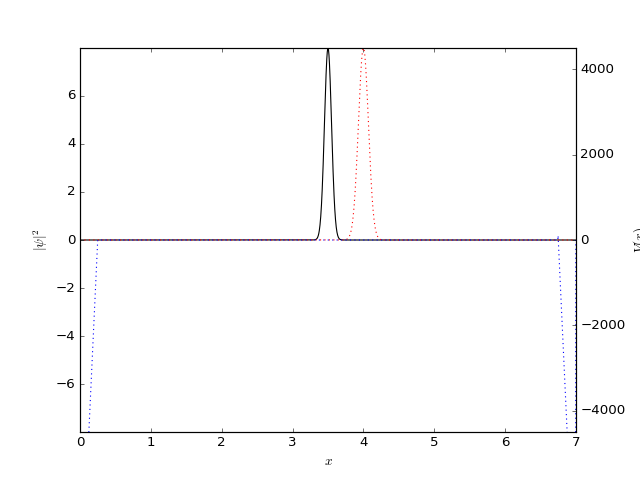

In [43]:
# Plot of the initial 
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, abs(psi0) ** 2,'k')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$|\psi|^2$')
ax1.set_ylim(-max(abs(psi0)**2),max(abs(psi0)**2))

ax2 = ax1.twinx()
ax2.plot(x,V.real,'r:')
ax2.plot(x,V.imag,'b:')
ax2.set_ylabel(r'$V(x)$', color='k')
ax2.set_ylim(-V0,V0)
for tl in ax2.get_yticklabels():
    tl.set_color('k')
plt.show()




#### Animation of the result

<IPython.core.display.Javascript object>


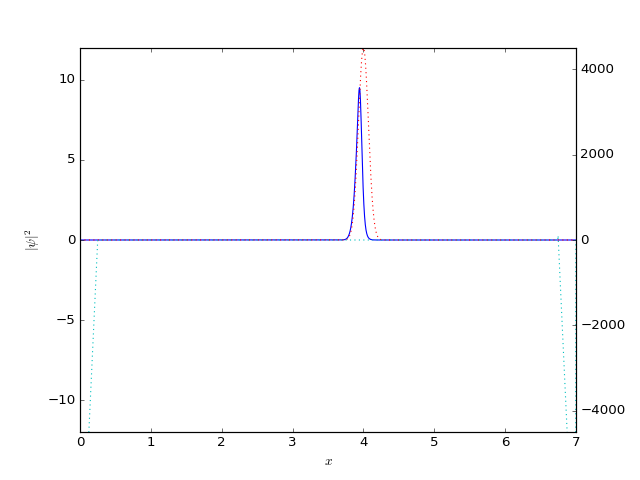

In [46]:
fig, ax = plt.subplots()
plt.xlabel(r'$x$')
plt.ylabel(r'$|\psi|^2$')
speed_factor = 100
line, = ax.plot(x, abs(psi0) ** 2)
ax2 = ax.twinx()
ax2.plot(x,V.real,'r:')
ax2.plot(x,V.imag,'c:')
ax.set_ylim((-1.5*max(abs(psi0) ** 2), 1.5*max(abs(psi0) ** 2)))
ax2.set_ylim(-V0,V0)

def animationFunc(i):
    #line.set_ydata(psi_t.real[i,:])  # update the data
    line.set_ydata(abs(psi_t[i * speed_factor,:]) **2)
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animationFunc, init_func=init, frames = (int)(N_t //speed_factor),
    interval=min(5 * speed_factor, 50), blit = True, repeat = False)
#display_animation(ani)

#### Animation of the spectral weight of the momentum over time

<IPython.core.display.Javascript object>


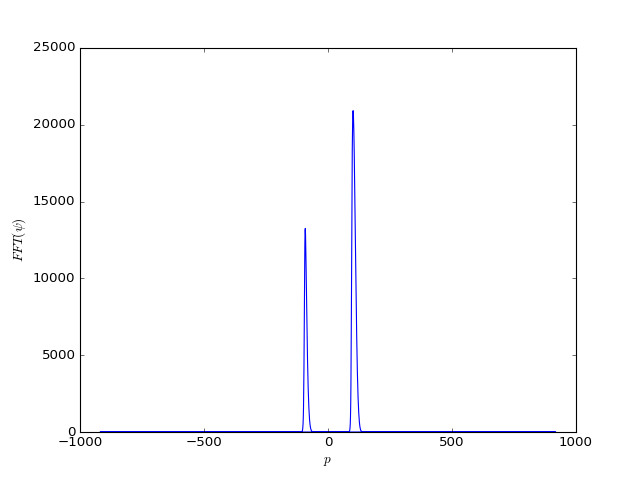

In [47]:
fig, ax = plt.subplots()
speed_factor = 150
line, = ax.plot(p, abs(np.fft.fft(psi0)) ** 2)
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$FFT(\psi)$')
def animationFunc(i):
    #line.set_ydata(psi_t.real[i,:])  # update the data
    line.set_ydata(abs((np.fft.fft(psi_t[i * speed_factor,:]))) **2)
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animationFunc, init_func=init, frames = (int)(N_t //speed_factor),
    interval=50, blit = True, repeat = False)
#display_animation(ani)

### Comments on the results
somesgdfg d